In [27]:
import Training
from Training import load_images
from TrainingProcess import process_frames
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# raw_images0 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_09-10-44", 100)
# raw_images00 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_13-50-24", 100)
# raw_images000 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_16-16-24", 100)
# raw_images1 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-27_17-13-40", 100)
# raw_images2 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-28_14-13-53", 100)
# raw_images3 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-28_16-32-46", 100)
# raw_images4 = load_images(
#     "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-28_16-53-11", 100)
raw_images5 = load_images(
    "C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-30_08-53-37", 100)





Loading from C:\dev\play\fatigue\Driver-State-Detection\driver_state_detection\training\2024-05-30_08-53-37
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-26.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-27.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-28.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-29.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-30.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-33-orig-31.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training

In [29]:
import random

# Assume raw_images1, raw_images2, raw_images3, raw_images4 are your datasets
#datasets = [raw_images0, raw_images00, raw_images000, raw_images1, raw_images2, raw_images3, raw_images4]
datasets = [raw_images5]

all_images = []

for dataset in datasets:
    # Select 5 random documents from the current dataset
    if len(dataset) >= 5:
        sample = random.sample(dataset, 5)
        for x in sample:
            print(f"Sample: {x[0]}")
        # Add the selected documents to all_images
        all_images.extend(sample)
    else:
        all_images.extend(dataset)


Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-36-orig-16.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-34-orig-30.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-34-orig-7.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-35-orig-29.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-34-orig-1.jpg


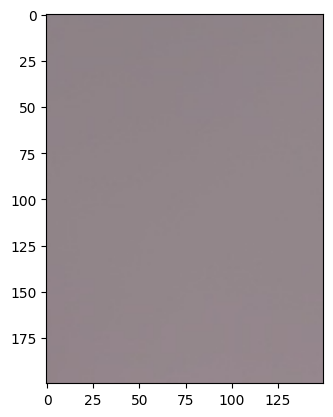

In [30]:
import cv2

x1, y1 = 550, 200
x2, y2 = 700, 400

imgcopy = raw_images5[0][1].copy()
zoomed = imgcopy[y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(zoomed, cv2.COLOR_BGR2RGB))

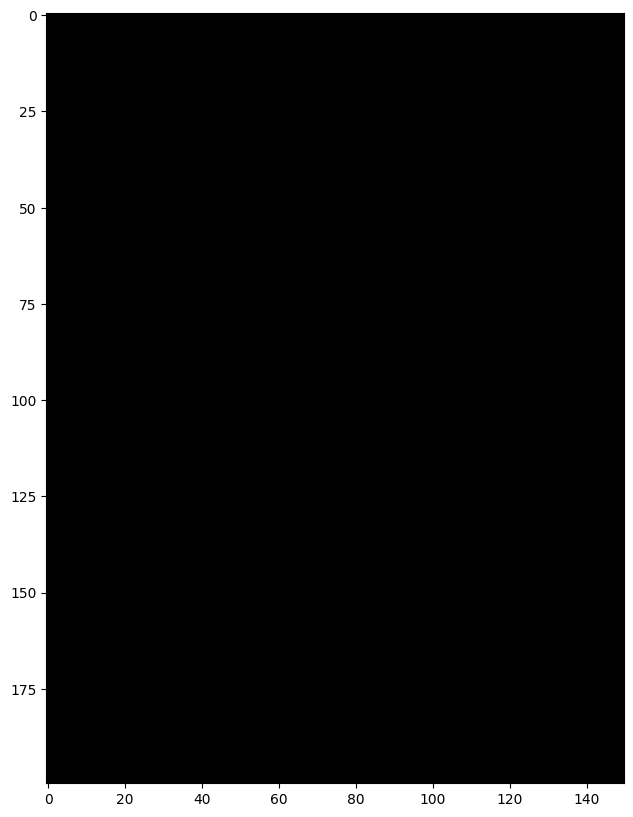

In [31]:
imgcopy = raw_images5[0][1].copy()
import mediapipe as mp
import cv2

detector = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5,
                                           min_tracking_confidence=0.5, refine_landmarks=True)

x1, y1 = 100, 200
x2, y2 = 300, 400

# Crop the image to the defined area
zoomed = imgcopy[y1:y2, x1:x2]

landmarks = detector.process(cv2.cvtColor(imgcopy, cv2.COLOR_BGR2RGB)).multi_face_landmarks[0].landmark
left_eye_landmarks_halo_x2 = [
    # Lower contour.
    # 33, 7, 163, 144, 145, 153, 154, 155, 133,
    # upper contour (excluding corners).
    # 246, 161, 160, 159, 158, 157, 173,
    # Halo x2 lower contour.
    130, 25, 110, 24, 23, 22, 26, 112, 243,
    # Halo x2 upper contour (excluding corners).
    247, 30, 29, 27, 28, 56, 190,
    # Halo x3 lower contour.
    # 226, 31, 228, 229, 230, 231, 232, 233, 244,
    # Halo x3 upper contour (excluding corners).
    # 113, 225, 224, 223, 222, 221, 189,
    # Halo x4 upper contour (no lower because of mesh structure) or
    # eyebrow inner contour.
    # 35, 124, 46, 53, 52, 65,
    # Halo x5 lower contour.
    # 143, 111, 117, 118, 119, 120, 121, 128, 245,
    # Halo x5 upper contour (excluding corners) or eyebrow outer contour.
    # 156, 70, 63, 105, 66, 107, 55, 193
]
left_eye_landmarks_halo_x1 = [
    # Lower contour.
    33, 7, 163, 144, 145, 153, 154, 155, 133,
    # upper contour (excluding corners).
    246, 161, 160, 159, 158, 157, 173,
]
left_eye_iris_landmarks = [
    # Center.
    468,
    # Iris right edge.
    469,
    # Iris top edge.
    470,
    # Iris left edge.
    471,
    # Iris bottom edge.
    472
]
for i in left_eye_landmarks_halo_x1:
    x = int(landmarks[i].x * imgcopy.shape[1])
    y = int(landmarks[i].y * imgcopy.shape[0])
    cv2.circle(imgcopy, (x, y), 1, (0, 0, 255), -1)
for i in left_eye_landmarks_halo_x2:
    x = int(landmarks[i].x * imgcopy.shape[1])
    y = int(landmarks[i].y * imgcopy.shape[0])
    # print(f"Landmark {i} ({eye_landmark_names[i]}) at {x}x{y} (min {min_x}x{min_y}, max {max_x}x{max_y})")
    cv2.circle(imgcopy, (x, y), 1, (0, 255, 255), -1)
    #cv2.putText(imgcopy, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
for i in left_eye_iris_landmarks:
    x = int(landmarks[i].x * imgcopy.shape[1])
    y = int(landmarks[i].y * imgcopy.shape[0])
    cv2.circle(imgcopy, (x, y), 1, (255, 0, 0), -1)

fig = plt.figure(figsize=(10, 10))

import numpy as np

# Initialize an empty mask with the same size as the image
mask = np.zeros_like(imgcopy)
# Create an array of points for the polygon
points = np.array(
    [(landmarks[i].x * imgcopy.shape[1], landmarks[i].y * imgcopy.shape[0]) for i in left_eye_landmarks_halo_x2],
    np.int32)
# 
ellipse = cv2.fitEllipse(points)
# 
# # Draw and fill the ellipse on the mask
cv2.ellipse(mask, ellipse, (255, 255, 255), -1)
# 
# # Invert the mask
#mask = cv2.bitwise_not(mask)
# 
# # 
# # # Bitwise-AND the mask and the original image
result = cv2.bitwise_and(imgcopy, mask)

# # # 
# # # 
x1, y1 = 550, 200
x2, y2 = 700, 400
# # 
# zoomed = result[y1:y2, x1:x2]
result = result[y1:y2, x1:x2]
# 
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))


In [32]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-36-orig-7.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-35-orig-18.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-34-orig-20.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-34-orig-14.jpg
Sample: C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_08-53-37\2024-05-30_08-53-36-orig-23.jpg


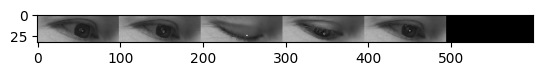

In [47]:
import cv2
import mediapipe as mp
import numpy as np

import TrainingConstants as tc

class OriginalImage:
    def __init__(self, filename, original_image):
        self.filename = filename
        self.original_image = original_image

class ProcessedImage:
    # All images are in colour
    eye_img_orig = None
    eye_img_final = None
    eye_img_steps = []
    original_image: OriginalImage = None
    pupil_center_pixel = None


def process_frames_copy(images: list[OriginalImage]):
    detector = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5, refine_landmarks=True)
    processed_images: list[ProcessedImage] = []
    image_idx = 0
    debug = False
    for img in images:
        #debug = image_idx == 1
        processed_image = process_image_copy(detector, img, image_idx, debug)
        image_idx += 1
        if processed_image is not None:
            processed_images.append(processed_image)
    return processed_images

# https://github.com/tensorflow/tfjs-models/blob/master/face-landmarks-detection/src/tfjs/constants.ts
#left_eye_landmarks = [33, 7, 163, 144, 145, 153, 154, 155, 468, 246, 161, 160, 159, 158, 157, 173, 474]
left_eye_landmarks = [
    # Lower contour.
    # 33, 7, 163, 144, 145, 153, 154, 155, 133,
    # upper contour (excluding corners).
    # 246, 161, 160, 159, 158, 157, 173,
    # Halo x2 lower contour.
    130, 25, 110, 24, 23, 22, 26, 112, 243,
    # Halo x2 upper contour (excluding corners).
    247, 30, 29, 27, 28, 56, 190,
    # Halo x3 lower contour.
    # 226, 31, 228, 229, 230, 231, 232, 233, 244,
    # Halo x3 upper contour (excluding corners).
    # 113, 225, 224, 223, 222, 221, 189,
    # Halo x4 upper contour (no lower because of mesh structure) or
    # eyebrow inner contour.
    # 35, 124, 46, 53, 52, 65,
    # Halo x5 lower contour.
    # 143, 111, 117, 118, 119, 120, 121, 128, 245,
    # Halo x5 upper contour (excluding corners) or eyebrow outer contour.
    # 156, 70, 63, 105, 66, 107, 55, 193
]

left_eye_iris_landmarks = [
    # Center.
    468,
    # Iris right edge.
    469,
    # Iris top edge.
    470,
    # Iris left edge.
    471,
    # Iris bottom edge.
    472
]

def get_landmarks_copy(detector, img, debug):
    if debug:
        print(f"Processing image with detector")
    # results = detector.process(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    results = detector.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks:
        return results.multi_face_landmarks[0].landmark
    else:
        return None

def calculate_bounding_box_copy(landmarks, img, left_eye_landmarks, debug):
    min_x = max_x = int(landmarks[left_eye_landmarks[0]].x * img.shape[1])
    min_y = max_y = int(landmarks[left_eye_landmarks[0]].y * img.shape[0])
    if debug:
        print(f"Initial bounding box: {min_x}x{min_y} to {max_x}x{max_y}")
    for i in left_eye_landmarks:
        x = int(landmarks[i].x * img.shape[1])
        y = int(landmarks[i].y * img.shape[0])
        min_x = min(min_x, x)
        max_x = max(max_x, x)
        min_y = min(min_y, y)
        max_y = max(max_y, y)
        if debug:
            # print(f"Landmark {i} ({eye_landmark_names[i]}) at {x}x{y} (min {min_x}x{min_y}, max {max_x}x{max_y})")
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
    return min_x, min_y, max_x, max_y

def calculate_center_of_iris_copy(landmarks, img, iris_landmark, debug):
    center_x = int(landmarks[iris_landmark].x * img.shape[1])
    center_y = int(landmarks[iris_landmark].y * img.shape[0])
    if debug:
        print(f"Center of iris: {center_x}x{center_y}")
    return center_x, center_y

def adjust_bounding_box_copy(min_x, min_y, max_x, max_y, img, center_x, center_y, debug):

    width = max_x - min_x
    height = max_y - min_y
    center_x = min_x + width // 2
    center_y = min_y + height // 2
    if debug:
        print(f"Bounding box dimensions: {min_x}x{min_y} to {max_x}x{max_y} {width}x{height} ratio: {round(width / height, 2)}, want to centre on {center_x}x{center_y}")
    if width / height < 3:
        width = height * 3
        min_x = center_x - width // 2
        max_x = center_x + width // 2
    elif height < width / 3:
        height = width / 3
        min_y = center_y - height // 2
        max_y = center_y + height // 2
    if debug:
        print(f"Adjusted bounding box dimensions: {width}x{height} ratio: {round(width / height, 2)}")
    min_x = int(max(0, min_x))
    min_y = int(max(0, min_y))
    max_x = int(min(img.shape[1], max_x))
    max_y = int(min(img.shape[0], max_y))
    if debug:
        print(f"Final bounding box: {min_x}x{min_y} to {max_x}x{max_y}")
    return min_x, min_y, max_x, max_y

def process_image_copy(detector, original: OriginalImage, image_idx, debug=False) -> ProcessedImage:
    img = original.original_image.copy()
    out = ProcessedImage()
    #raise Exception("Not implemented")
    landmarks = get_landmarks_copy(detector, img, debug)
    if landmarks is not None:
        min_x, min_y, max_x, max_y = calculate_bounding_box_copy(landmarks, img, left_eye_landmarks, debug)
        center_x, center_y = calculate_center_of_iris_copy(landmarks, img, 468, debug)
        min_x, min_y, max_x, max_y = adjust_bounding_box_copy(min_x, min_y, max_x, max_y, img, center_x, center_y, debug)

        # mean = 85.52094439538355
        # std = 43.0911352711331

        # Just normalize the eye portion
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pupil_x = int(landmarks[468].x * gray.shape[1])
        pupil_y = int(landmarks[468].y * gray.shape[0])
        out.pupil_center_pixel = gray[pupil_y, pupil_x]
        cv2.circle(gray, (pupil_x, pupil_y), 3, (255, 0, 0), 1)
        eye_img = gray[min_y:max_y, min_x:max_x]
        out.eye_img_orig = img[min_y:max_y, min_x:max_x].copy()
        # eye_img = (eye_img - mean) / std
        # eye_img = cv2.convertScaleAbs(eye_img, alpha=(255.0))
        out.eye_img_steps.append(cv2.cvtColor(eye_img.copy(), cv2.COLOR_GRAY2BGR))
        out.eye_img_final = cv2.resize(cv2.cvtColor(eye_img.copy(), cv2.COLOR_GRAY2BGR), (tc.EYE_IMAGE_WIDTH, tc.EYE_IMAGE_HEIGHT))
        # Increase the contrast
        # alpha: contrast control (1.0-3.0)
        # beta: brightness control (0-100)
        # alpha = 1.5
        # beta = 0
        # eye_img = cv2.convertScaleAbs(eye_img, alpha=alpha, beta=beta)

        #eye_img = cv2.normalize(eye_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        img[min_y:max_y, min_x:max_x] = cv2.cvtColor(eye_img, cv2.COLOR_GRAY2BGR)

        for i in left_eye_iris_landmarks:
            x = int(landmarks[i].x * img.shape[1])
            y = int(landmarks[i].y * img.shape[0])
            if i != 0:
                cv2.circle(img, (x, y), 1, (255, 0, 0), -1)

        mask = np.zeros_like(img)
        points = np.array([(landmarks[i].x * img.shape[1], landmarks[i].y * img.shape[0]) for i in left_eye_landmarks], np.int32)
        ellipse = cv2.fitEllipse(points)
        cv2.ellipse(mask, ellipse, (255, 255, 255), -1)
        masked = cv2.bitwise_and(img, mask)


        eye_img = masked[min_y:max_y, min_x:max_x]
        eye_img = cv2.resize(eye_img, (tc.EYE_IMAGE_WIDTH, tc.EYE_IMAGE_HEIGHT))

        out.eye_img_steps.append(eye_img.copy())

        # Not gray at this point because may have colour debug info

        return out

#from TrainingProcess import process_frames
%autoreload now

all_images = []

for dataset in datasets:
    # Select 5 random documents from the current dataset
    if len(dataset) >= 5:
        sample = random.sample(dataset, 5)
        # Add the selected documents to all_images
        all_images.extend(sample)
    else:
        all_images.extend(dataset)

for x in all_images:
    print(f"Sample: {x[0]}")

all_images = map(lambda x: OriginalImage(x[0], x[1]), all_images) 
             
processed = process_frames_copy(all_images)

for i in range(len(processed)):
    pixel = processed[i].pupil_center_pixel
    if pixel is None:
        pixel = "None"
    else:
        pixel = str(pixel)
    cv2.putText(processed[i].eye_img_orig, pixel, (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1,
                cv2.LINE_AA)

def cram_homogenous_images(images: list[ProcessedImage], output_x):
    img_width = images[0].eye_img_final.shape[1]
    img_height = images[0].eye_img_final.shape[0]
    
    num_cols = int(output_x / img_width)
    num_rows = (len(images) // num_cols) + 1
    output_y = num_rows * img_height

    out = np.zeros((output_y, output_x, 3), dtype=np.uint8)

    for i in range(min(num_rows * num_cols, len(images))):
        row = i // num_cols
        col = i % num_cols
        x = col * img_width
        y = row * img_height
        # if y + img_height <= out.shape[0] and x + img_width <= processed.shape[1]:
        out[y:y + img_height, x:x + img_width] = cv2.resize(images[i].eye_img_final, (img_width, img_height))
    return out

out = (cram_homogenous_images(processed[0:30], 600))
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(out)

In [ ]:
plt.imshow(cv2.cvtColor(raw_images5[0][1], cv2.COLOR_BGR2RGB))


In [ ]:
rgb_data = images[0][1]
h, w = rgb_data.shape

inches_for_width = w / fig.dpi
inches_for_height = h / fig.dpi
h, w, inches_for_width, inches_for_height


In [ ]:
selected_images = images



In [ ]:
rgb_data = selected_images[0]
h, w, _ = rgb_data.shape

inches_for_width = w / fig.dpi
inches_for_height = h / fig.dpi
h, w, inches_for_width, inches_for_height

In [ ]:
import cv2
import cv2
import ipywidgets as widgets
from IPython.display import display

images_to_display = len(selected_images)


def update_threshold(threshold):
    print(f"Threshold: {threshold}")
    fig = plt.figure()

    rgb_data = selected_images[0]
    h, w, _ = rgb_data.shape

    inches_for_width = w / fig.dpi
    inches_for_height = h / fig.dpi

    columns = 6
    fig.set_size_inches(inches_for_width * columns, inches_for_height * images_to_display)

    for i in range(images_to_display):
        col = 0
        # First column
        ax1 = fig.add_axes([0, i * inches_for_height, inches_for_width, inches_for_height])
        ax1.axis('off')
        col += 1
        ax2 = fig.add_axes([inches_for_width, i * inches_for_height, inches_for_width, inches_for_height])
        ax2.axis('off')
        col += 1
        ax3 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
        ax3.axis('off')
        col += 1
        ax4 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
        ax4.axis('off')
        col += 1
        ax5 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
        ax5.axis('off')
        col += 1
        ax6 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
        ax6.axis('off')
        col += 1
        # ax7 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
        # ax7.axis('off')
        # col += 1
        # ax8 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
        # ax8.axis('off')
        # col += 1
        # ax9 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
        # ax9.axis('off')
        # col += 1
        # ax10 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
        # ax10.axis('off')
        # col += 1

        rgb = cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB)
        ax1.imshow(rgb, aspect='equal')

        gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
        ax2.imshow(gray, cmap='gray', aspect='equal')

        # img = gray
        # img = cv2.GaussianBlur(img, (3, 3), 1)
        # ax3.imshow(img, cmap='gray', aspect='equal')
        gray = cv2.normalize(gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        ax3.imshow(gray, cmap='gray', aspect='equal')

        invert = cv2.bitwise_not(gray)
        ax4.imshow(invert, cmap='gray', aspect='equal')

        # img = cv2.Canny(img, 20, 100)
        # ax5.imshow(img, cmap='gray', aspect='equal')

        # Hopefully the area we don't care about
        mask_outside_eye = cv2.inRange(invert, 255, 255)

        # Get the original size of the image
        original_size = mask_outside_eye.shape

        # Define the scale factor for shrinking the image
        scale_factor = 0.9  # 90% of the original size

        # Calculate the new size of the image
        new_width = int(original_size[1] * scale_factor)
        new_height = int(original_size[0] * scale_factor)
        #new_size = (int(original_size[1]*scale_factor), int(original_size[0]*scale_factor))

        # Resize (shrink) the image
        shrunken_mask_outside_eye = cv2.resize(mask_outside_eye, (new_width, new_height))

        # Calculate the size of the padding
        pad_top = (original_size[0] - new_height) // 2
        pad_bottom = original_size[0] - new_height - pad_top
        pad_left = (original_size[1] - new_width) // 2
        pad_right = original_size[1] - new_width - pad_left

        # print(f"Original size: {original_size} {original_size[0]}, shrunk {shrunken_mask_outside_eye.shape}, padding: {pad_top, pad_bottom, pad_left, pad_right}")

        # Pad the shrunken image with white pixels to bring it back to the original size
        mask_outside_eye = cv2.copyMakeBorder(shrunken_mask_outside_eye, pad_top, pad_bottom, pad_left, pad_right,
                                              cv2.BORDER_CONSTANT, value=255)

        # print(f"final size: {mask_outside_eye.shape}")

        # Hopefully the iris+pupil
        mask_light_areas = cv2.inRange(invert, threshold, 255)
        copy = rgb.copy()
        copy[mask_light_areas == 255] = (0, 0, 255)
        copy[mask_outside_eye == 255] = (255, 0, 0)

        ax5.imshow(mask_outside_eye, cmap='gray', aspect='equal')

        pixels_over_threshold = cv2.countNonZero(cv2.inRange(copy, (0, 0, threshold), (0, 0, 255)))
        cv2.putText(copy, str(pixels_over_threshold), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1,
                    cv2.LINE_AA)

        ax6.imshow(copy, aspect='equal')

    plt.subplots_adjust(wspace=0, hspace=0)  # Remove padding between subplots
    plt.show()


threshold_slider = widgets.IntSlider(min=0, max=255, step=1, value=180, description='Threshold:')
threshold_slider.observe(lambda change: update_threshold(change.new), names='value')

button = widgets.Button(description='Click me')


# Define a function to be called when the button is clicked
def on_button_clicked(b):
    print('Button clicked.')
    update_threshold(threshold_slider.value)


# Register the function to be called when the button is clicked
button.on_click(on_button_clicked)

display(threshold_slider)
display(button)

update_threshold(threshold_slider.value)


# Display the button


In [ ]:
import cv2
import cv2
import ipywidgets as widgets
from IPython.display import display

images_to_display = len(selected_images)

fig = plt.figure()

columns = 6
fig.set_size_inches(inches_for_width * columns, inches_for_height * images_to_display)

for i in range(images_to_display):
    col = 0
    # First column
    ax1 = fig.add_axes([0, i * inches_for_height, inches_for_width, inches_for_height])
    ax1.axis('off')
    col += 1
    ax2 = fig.add_axes([inches_for_width, i * inches_for_height, inches_for_width, inches_for_height])
    ax2.axis('off')
    col += 1
    ax3 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
    ax3.axis('off')
    col += 1
    ax4 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
    ax4.axis('off')
    col += 1
    ax5 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
    ax5.axis('off')
    col += 1
    ax6 = fig.add_axes([inches_for_width * col, i * inches_for_height, inches_for_width, inches_for_height])
    ax6.axis('off')
    col += 1
    # ax7 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax7.axis('off')
    # col += 1
    # ax8 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax8.axis('off')
    # col += 1
    # ax9 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax9.axis('off')
    # col += 1
    # ax10 = fig.add_axes([inches_for_width * col, i*inches_for_height, inches_for_width, inches_for_height])
    # ax10.axis('off')
    # col += 1

    rgb = cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB)
    ax1.imshow(rgb, aspect='equal')

    gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
    ax2.imshow(gray, cmap='gray', aspect='equal')

    img = gray
    # img = cv2.medianBlur(gray, 5)

    # Perform the Hough Circle Transform
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 1, param1=50, param2=10, minRadius=1, maxRadius=8)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        # Iterate over all detected circles and draw them on the image
        for (x, y, r) in circles:
            cv2.circle(rgb, (x, y), r, (0, 255, 0), 1)

        center_x = img.shape[1] // 2
        center_y = img.shape[0] // 2
        closest_circle = min(circles, key=lambda x: (x[0] - center_x) ** 2 + (x[1] - center_y) ** 2)
        cv2.circle(img, (closest_circle[0], closest_circle[1]), closest_circle[2], (255, 0, 0), 4)

    # If at least one circle is detected
    # if circles is not None:
    #     # Convert the (x, y) coordinates and radius of the circles to integers
    #     circles = np.round(circles[0, :]).astype("int")
    # 
    #     # Find the circle closest to the center of the image
    #     center_x = img.shape[1] // 2
    #     center_y = img.shape[0] // 2
    #     closest_circle = min(circles, key=lambda x: (x[0] - center_x) ** 2 + (x[1] - center_y) ** 2)
    #     cv2.circle(img, (closest_circle[0], closest_circle[1]), closest_circle[2], (255, 0, 0), 4)

    ax4.imshow(rgb, aspect='equal')

plt.subplots_adjust(wspace=0, hspace=0)  # Remove padding between subplots
plt.show()
